
# Plot Hierarchical Clustering Dendrogram

This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.


In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

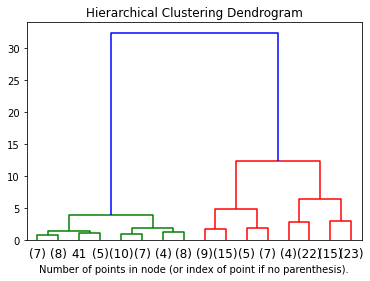

In [2]:
X = load_iris().data

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
        counts[i] = current_count
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
# Plot the corresponding dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
